In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from tqdm import tqdm
from censai.data.lenses_tng import decode_all, decode_train, decode_physical_model_info
from astropy.visualization import ImageNormalize, LogStretch
from censai.definitions import log_10

In [2]:
# datapath = "/home/aadam/scratch/Censai/data/lenses512_k128_TNG100/"
# datapath = "/home/aadam/scratch/Censai/data/lenses512_hk128_TNG100/"
# datapath = "/home/aadam/scratch/Censai/data/lenses512_hk128_TNG100_noshift40k/"
# datapath = "/home/aadam/scratch/Censai/data/lenses512_k128_NIE_10k/"
# datapath = "/home/aadam/scratch/Censai/data/lenses512_k128_NIE_10k_verydiffuse"
datapath = "/home/aadam/scratch/Censai/data/lenses512_hk128_TNG100_10k_verydiffuse"
# datapath = "/home/aadam/scratch/Censai/data/lenses128_TNG100_10k"


files = glob.glob(os.path.join(datapath, "*.tfrecords"))
files = tf.data.Dataset.from_tensor_slices(files)
dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type="GZIP"), block_length=1, num_parallel_calls=tf.data.AUTOTUNE)
for physical_params in dataset.map(decode_physical_model_info):
    break
print(physical_params)
dataset = dataset.map(decode_all)
# data = tf.data.TFRecordDataset(filenames, compression_type="GZIP").map(decode_all)
# data = tf.data.TFRecordDataset(files, compression_type="GZIP").map(decode_physical_model_info)

{'image fov': <tf.Tensor: shape=(), dtype=float32, numpy=17.425909>, 'kappa fov': <tf.Tensor: shape=(), dtype=float32, numpy=17.425909>, 'source fov': <tf.Tensor: shape=(), dtype=float32, numpy=10.0>, 'src pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>, 'kappa pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>, 'pixels': <tf.Tensor: shape=(), dtype=int64, numpy=512>, 'noise rms': <tf.Tensor: shape=(), dtype=float32, numpy=0.006>, 'psf sigma': <tf.Tensor: shape=(), dtype=float32, numpy=0.08>}


In [3]:
kappas = []
galaxies = []
lenses = []
einstein_radius = []
einstein_radius_init = []
rescalings = []
kappa_ids = []
kappa_max = []
kappa_min = []
kappa_max_before_rescaling = []
kappa_var = []
kappa_mean = []
i = 0
for example in tqdm(dataset):
    kappa_ids.append(example['kappa id'])
    einstein_radius.append(example['Einstein radius'].numpy())
    einstein_radius_init.append(example['Einstein radius before rescaling'].numpy())
    rescalings.append(example['rescaling factor'])
    kappa_max.append(np.max(example['kappa']))
    kappa_min.append(np.min(example['kappa']))
    kappa_max_before_rescaling.append(np.max(example['kappa'])/example['rescaling factor'].numpy())
    kappa_var.append(np.std(example['kappa']))
    kappa_mean.append(np.mean(example['kappa']))
    kappas.append(example['kappa'])
    galaxies.append(example['source'])
    lenses.append(example['lens'])
    i += 1
    if i == 1000:
        break

999it [00:14, 70.36it/s] 


In [32]:
# lenses = [lens/tf.reduce_max(lens, axis=(0, 1, 2)) for lens in lenses]
# magnification = [(tf.reduce_sum(lense)/20.**2*tf.reduce_sum(tf.cast(lenses[0]>0, tf.float32)) * 3.**2/tf.reduce_sum(source)/tf.reduce_sum(tf.cast(source>0, tf.float32))).numpy() for lense, source in zip(lenses, galaxies)]

In [33]:
# plt.hist(magnification, bins=50);
# plt.axvline(1, color="k")

In [34]:
# indexes = np.argsort(magnification)

In [35]:
# indexes[::-1]

In [ ]:
# index = indexes[-11]
# print(magnification[index])
# fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 
# axs[0].imshow(kappas[index][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
# axs[1].imshow(galaxies[index][..., 0], cmap="bone")
# axs[2].imshow(lenses[index][..., 0], cmap="bone")
# for j in range(3):
#     axs[j].axis("off")

In [ ]:
# tf.reduce_sum(galaxies[indexes[-11]])

In [ ]:
# from scipy.stats import boxcox
# from scipy.stats import gmean
# full_dataset = dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type="GZIP"), block_length=1, num_parallel_calls=tf.data.AUTOTUNE)
# full_dataset = full_dataset.map(decode_train)

# preprocess = lambda x: log_10(x) + 3
# lam = []
# g_mean = []
# i = 0
# for X, source, kappa in tqdm(full_dataset):
#     y, l = boxcox(preprocess(kappa).numpy().ravel())
# #     y, l = boxcox(kappa.numpy().ravel()) # skip entirely the log, since boxcox can replace it altogether
#     lam.append(l)
#     g_mean.append(gmean(preprocess(kappa).numpy().ravel()))
#     if i == 5000:
#         break
#     i += 1
# # N = 128**2
# # kappa_pixels = np.concatenate(list(map(preprocess, kappas[:1]))).ravel()
# # mean = kappa_pixels.mean()
# # var = kappa_pixels.var()
# # m3 = np.mean((kappa_pixels - mean)**3)
# # skew = (N * (N - 1))**(1/2) / (N - 2) * m3 / var**(3/2)
# # m4 = np.mean((kappa_pixels - mean)**4)
# # excess_kurtosis = (var**2 / m4)**(3)
# # print(skew)
# # print(excess_kurtosis)

In [ ]:
# _, bins, _ = plt.hist(lam, bins=100);

In [ ]:
# plt.hist(g_mean, bins=100);

In [ ]:
# lam_mean = sum(lam) / len(lam)
# lam_mean

In [ ]:
# np.median(lam)

In [12]:
# # lam_mean = -1/2
# gmean_mean = sum(g_mean) / len(g_mean)
# transform = lambda x: (x**lam_mean - 1) / lam_mean / gmean_mean**(lam_mean - 1)
# lam_mean

In [13]:
# kappa_pixels = preprocess(tf.concat(kappas, axis=0)).numpy().ravel()
# y, l = boxcox(kappa_pixels)
# print(l)
# g = gmean(kappa_pixels)
# print(g)
# transform = lambda x: (x**l - 1) / l / g**(l - 1)
# # plt.hist(preprocess(kappas[0]).numpy().ravel(), bins=100);

In [5]:
# plt.hist(transform(kappa_pixels), bins=100);

In [14]:
# kappa_pixels = tf.concat(kappas, axis=0).numpy().ravel()
# y, l = boxcox(kappa_pixels)
# print(l)
# g = gmean(kappa_pixels)
# print(g)
# transform = lambda x: (x**l - 1) / l / g**(l - 1)
# # plt.hist(preprocess(kappas[0]).numpy().ravel(), bins=100);

In [15]:
# plt.hist(log_10(tf.concat(kappas, axis=0)).numpy().ravel(), bins=100);
# # plt.yscale("log")

In [16]:
# plt.hist(transform(kappa_pixels), bins=100);

In [17]:
# plt.hist(kappa_pixels, bins=100);

In [18]:
# plt.hist(transform(preprocess(kappas[0]).numpy().ravel()), bins=100);

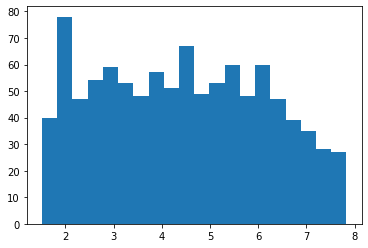

In [4]:
plt.hist(einstein_radius, bins=20);

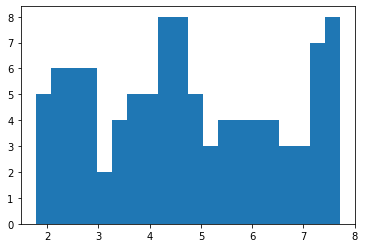

In [49]:
plt.hist(einstein_radius_init, bins=20);

In [21]:
# plt.hist(kappa_max, bins=20);
# plt.xscale("log")

In [22]:
# plt.hist(kappa_max_before_rescaling, bins=20);
# plt.xscale("log")

In [23]:
# plt.hist(kappa_min, bins=20);

In [24]:
# plt.hist(kappa_var, bins=20);
# plt.xscale("log")

In [25]:
# plt.hist(kappa_mean, bins=20);

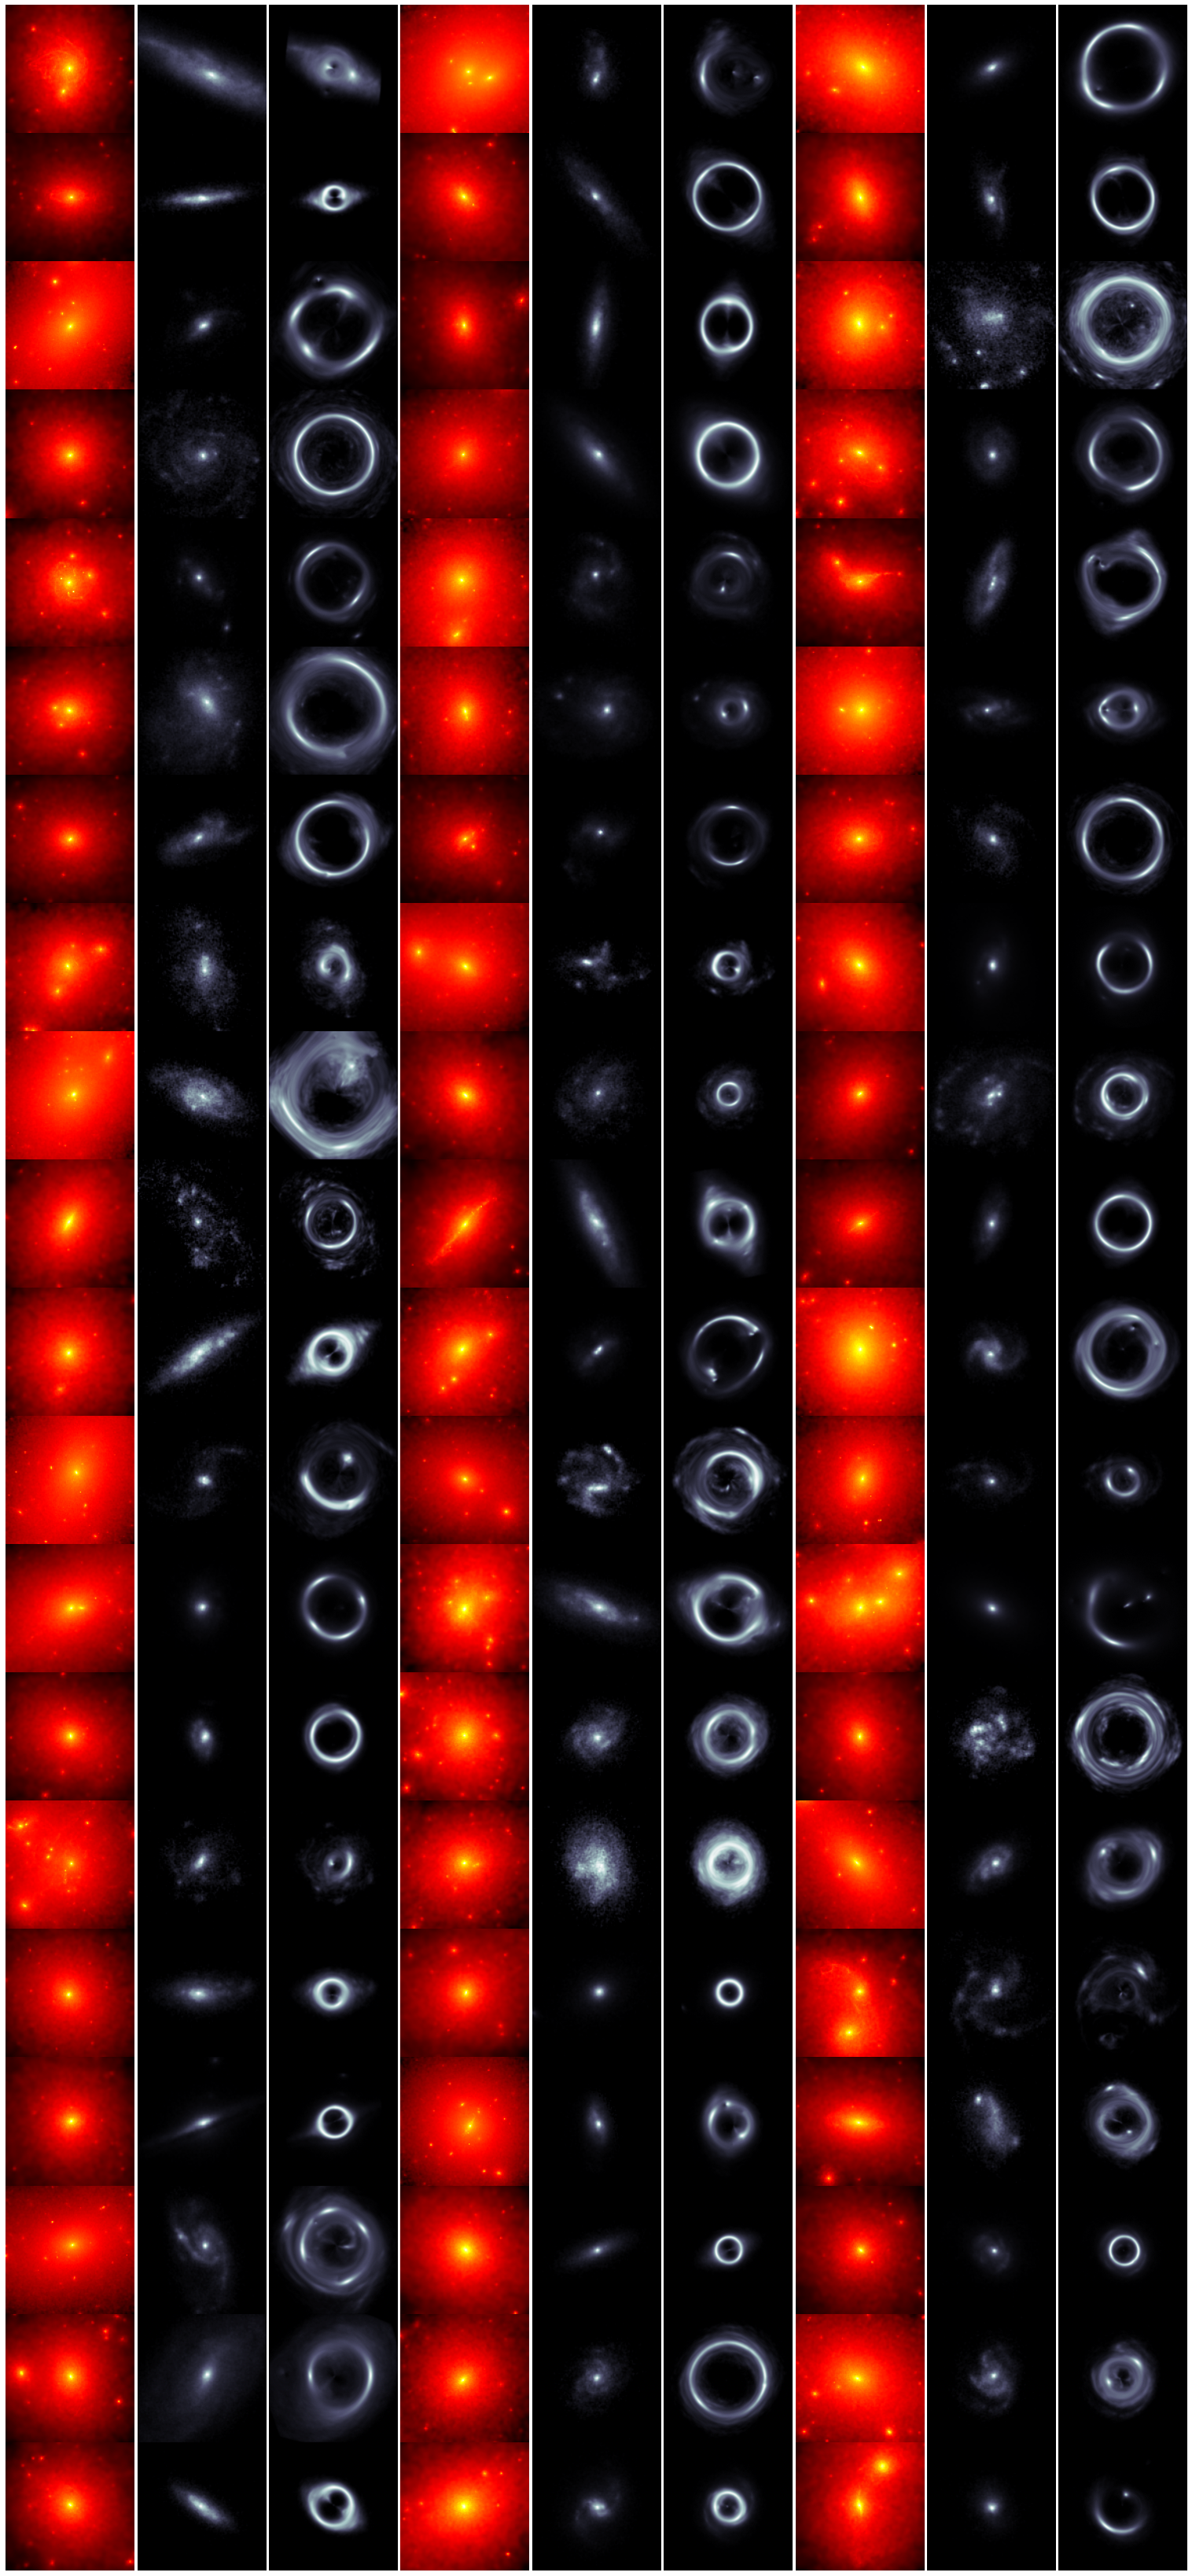

In [5]:
fig, axs = plt.subplots(20, 9, figsize=(27, 60))
start = 0#468
for i in range(0, 20):
    axs[i, 0].imshow(kappas[i+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 1].imshow(galaxies[i+start][..., 0], cmap="bone")
    axs[i, 2].imshow(lenses[i+start][..., 0], cmap="bone")
    for j in range(3):
        axs[i, j].axis("off")
        
for i in range(0, 20):
    axs[i, 3].imshow(kappas[i+start+20][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 4].imshow(galaxies[i+start+20][..., 0], cmap="bone")
    axs[i, 5].imshow(lenses[i+start+20][..., 0], cmap="bone")
    for j in range(3, 6):
        axs[i, j].axis("off")

for i in range(0, 20):
    axs[i, 6].imshow(kappas[i+start+40][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 7].imshow(galaxies[i+start+40][..., 0], cmap="bone")
    axs[i, 8].imshow(lenses[i+start+40][..., 0], cmap="bone")
    for j in range(6, 9):
        axs[i, j].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

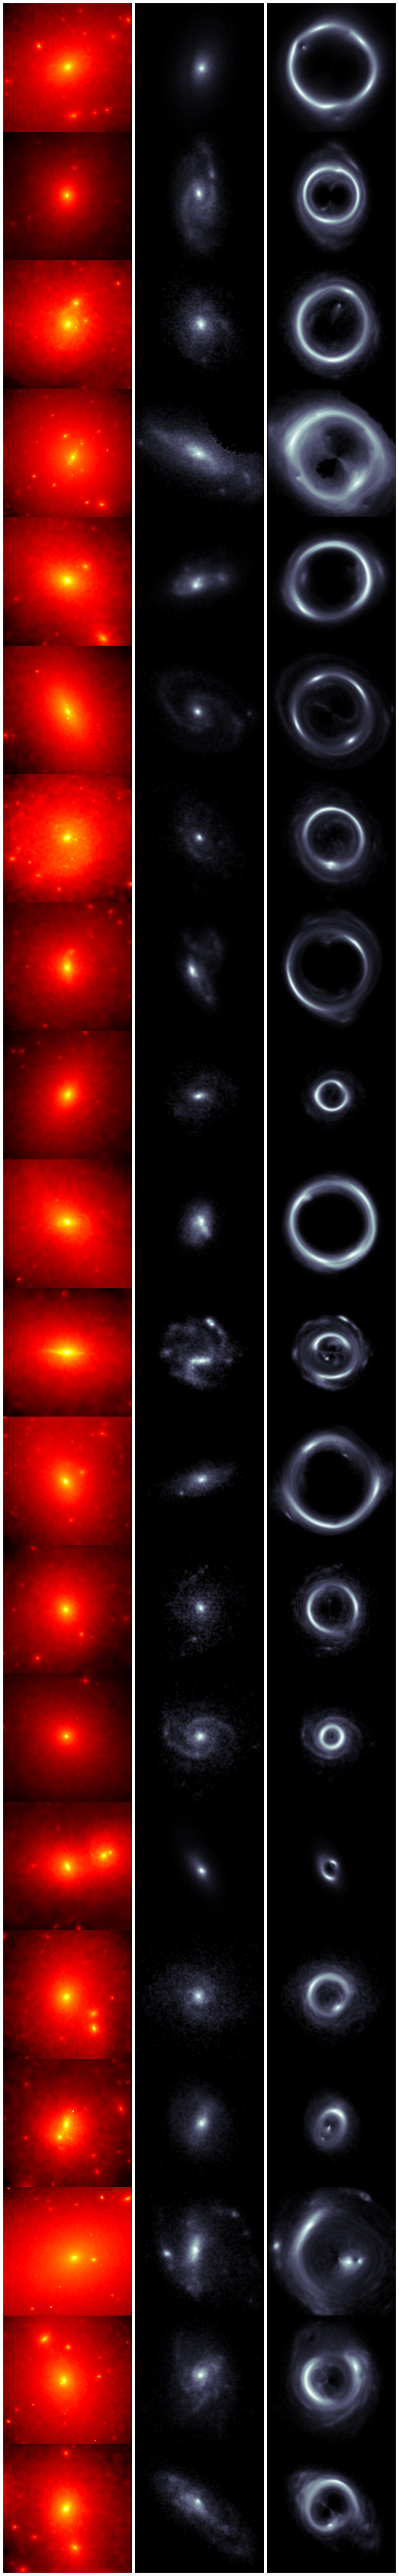

In [6]:
fig, axs = plt.subplots(20, 3, figsize=(15, 100))
start = 200
for i in range(0, 20):
    axs[i, 0].imshow(kappas[i+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 1].imshow(galaxies[i+start][..., 0], cmap="bone")
    axs[i, 2].imshow(lenses[i+start][..., 0], cmap="bone")
    for j in range(3):
        axs[i, j].axis("off")
plt.subplots_adjust(wspace=0, hspace=0)

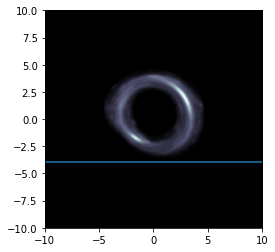

In [7]:
plt.imshow(lenses[208][..., 0], cmap="bone", extent=[-10, 10, -10, 10])
plt.axhline(-einstein_radius[208])

In [50]:
# fig, axs = plt.subplots(6, 12, figsize=(54, 27))
# start = 190
# ell = 0
# for i in range(6):
#     for j in range(12):
#         axs[i, j].imshow(transform(preprocess(kappas[ell+start][..., 0])), cmap="hot")
#         axs[i, j].axis("off")
#         ell += 1
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig("KappaTNG100.png")

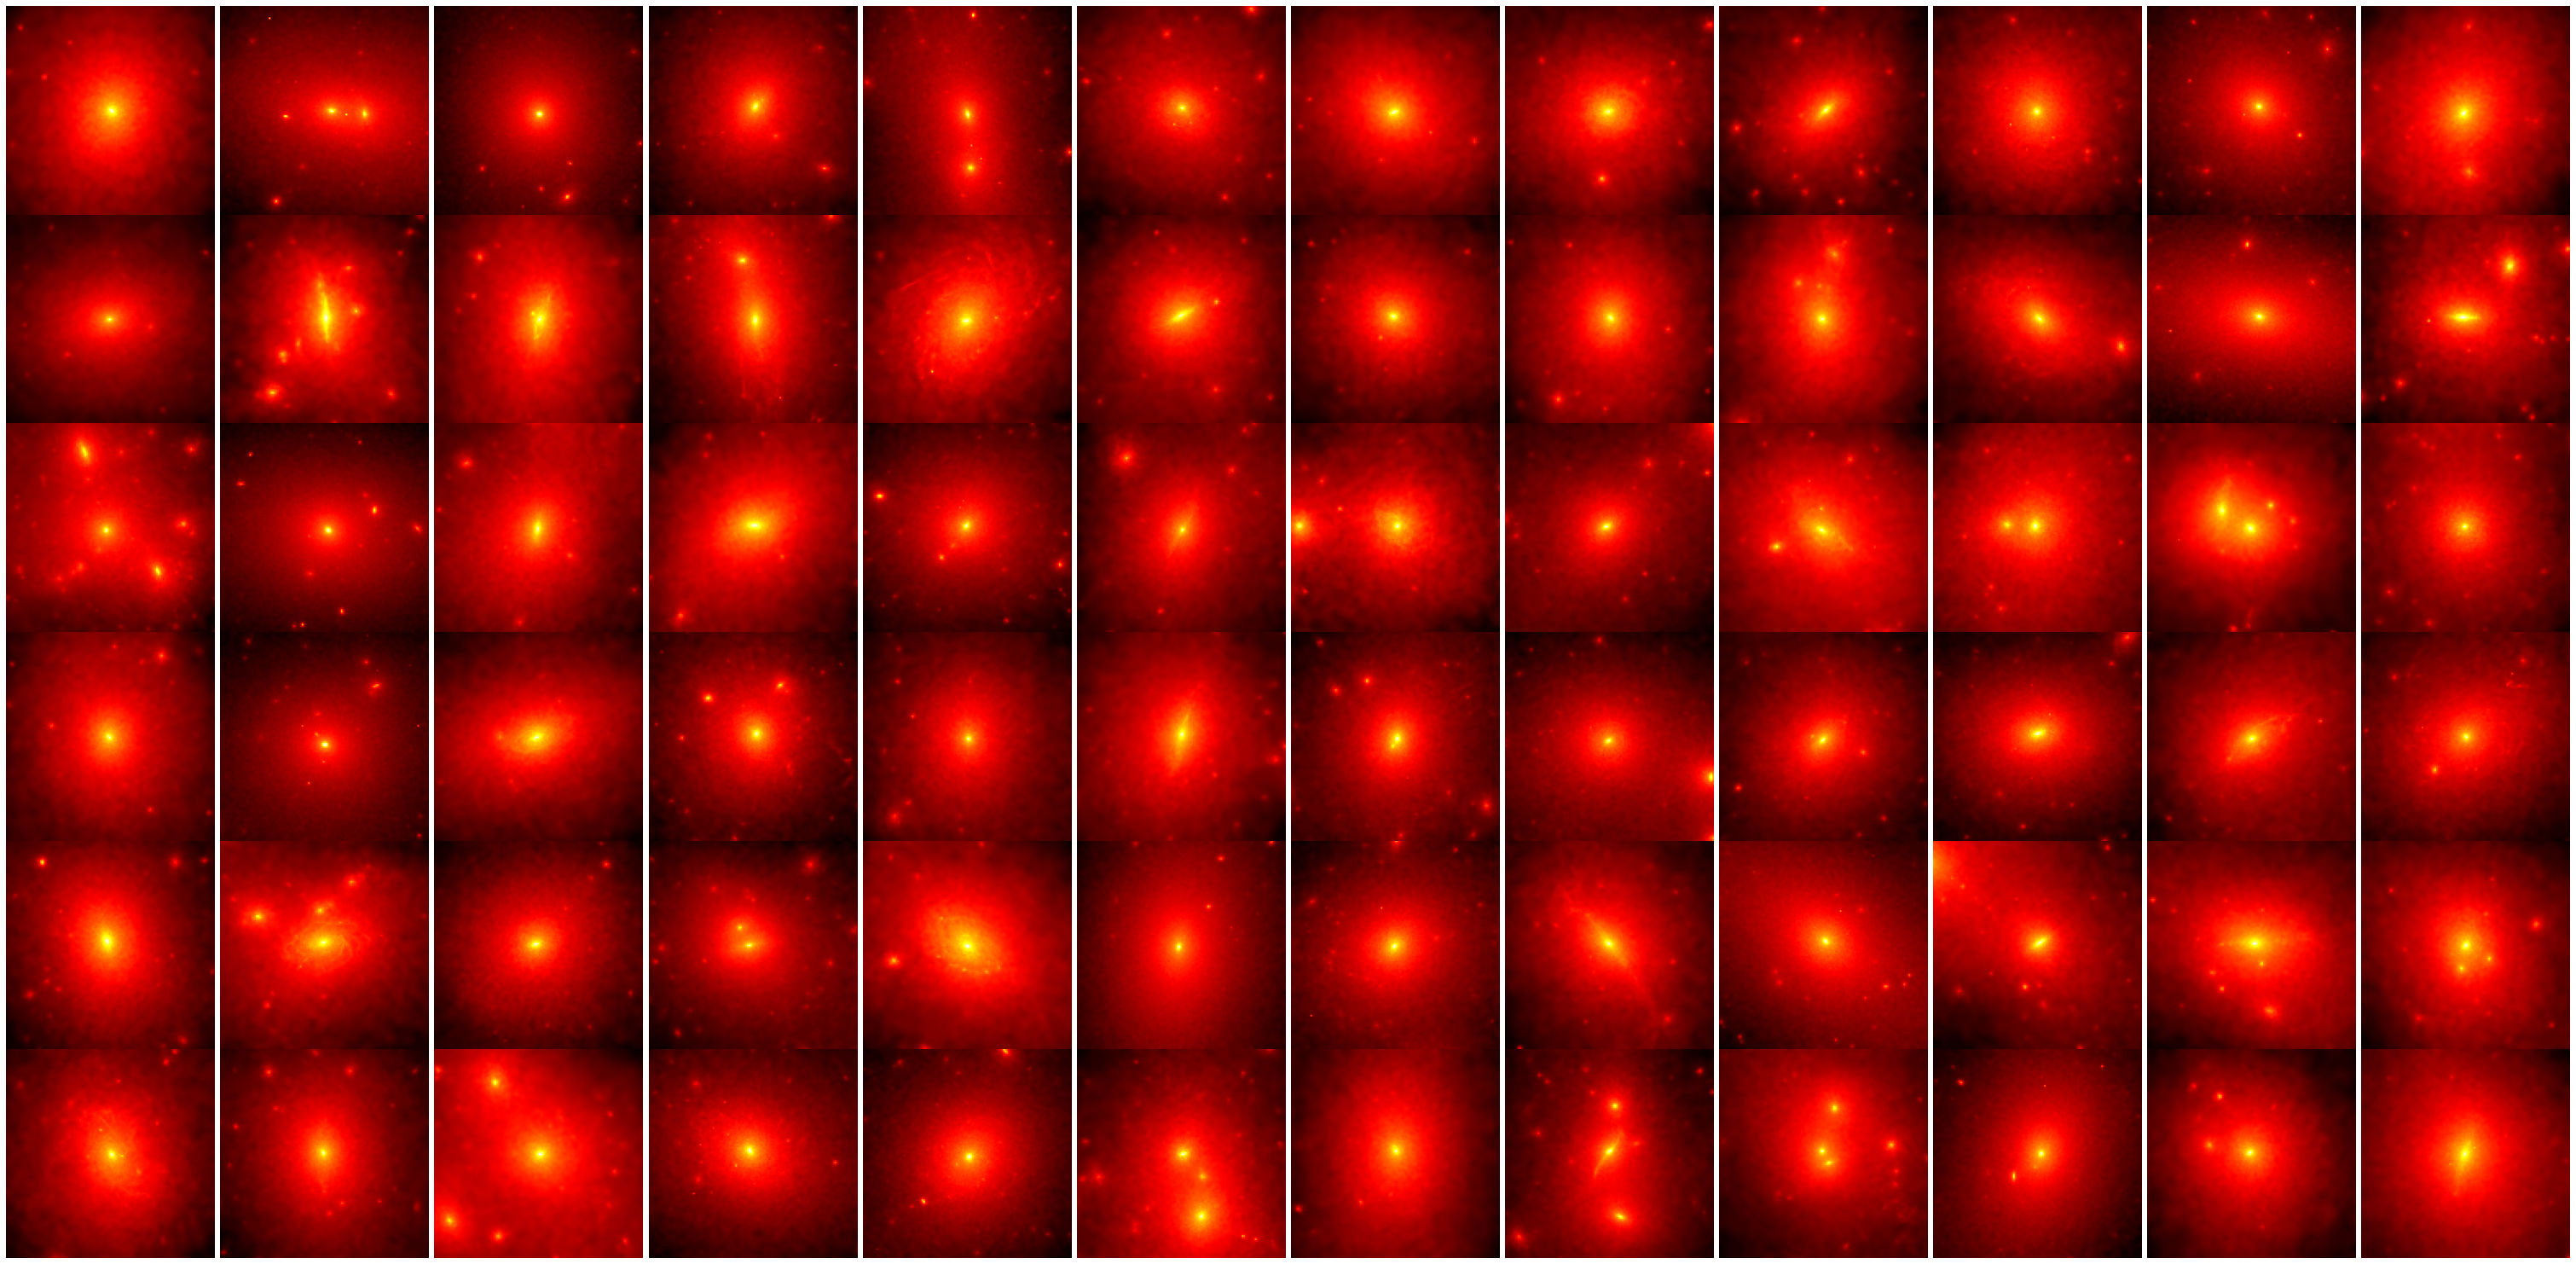

In [24]:
fig, axs = plt.subplots(6, 12, figsize=(54, 27))
start = 190
ell = 0
for i in range(6):
    for j in range(12):
        axs[i, j].imshow(preprocess(kappas[ell+start][..., 0]), cmap="hot")
        axs[i, j].axis("off")
        ell += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("KappaTNG100.png")